# Genome-scale metabolic models

## Preparation

In [3]:
from cameo import load_model

model = load_model('data/iJO1366.xml.gz')

## Model content

### Metabolites

The model contains a list of metabolites.

In [57]:
model.metabolites

[<Metabolite 10fthf_c at 0x10bb2cd30>,
 <Metabolite 12dgr120_c at 0x10ba5c358>,
 <Metabolite 12dgr140_c at 0x10ba5c5c0>,
 <Metabolite 12dgr141_c at 0x10ba5c8d0>,
 <Metabolite 12dgr160_c at 0x10ba5cac8>,
 <Metabolite 12dgr161_c at 0x10ba5cdd8>,
 <Metabolite 12dgr180_c at 0x10ba5e080>,
 <Metabolite 12dgr181_c at 0x10ba5e358>,
 <Metabolite 12ppd__R_c at 0x1045b3e48>,
 <Metabolite 12ppd__S_c at 0x1045b40b8>,
 <Metabolite 13dpg_c at 0x10ba685f8>,
 <Metabolite 14dhncoa_c at 0x118f2e3c8>,
 <Metabolite 14glucan_c at 0x1221cef98>,
 <Metabolite 15dap_c at 0x1045bce48>,
 <Metabolite 1ddecg3p_c at 0x122662e10>,
 <Metabolite 1hdec9eg3p_c at 0x122663438>,
 <Metabolite 1hdecg3p_c at 0x1226632e8>,
 <Metabolite 1odec11eg3p_c at 0x122663710>,
 <Metabolite 1odecg3p_c at 0x1226635c0>,
 <Metabolite 1pyr5c_c at 0x10bae00f0>,
 <Metabolite 1tdec7eg3p_c at 0x122663128>,
 <Metabolite 1tdecg3p_c at 0x122662f98>,
 <Metabolite 23dappa_c at 0x11ed6c5f8>,
 <Metabolite 23ddhb_c at 0x1045ac400>,
 <Metabolite 23dhacoa_

There are 1805 metabolites in this list.

In [3]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [4]:
model.metabolites.g3p_c

Id,g3p_c
Name,Glyceraldehyde 3-phosphate
Formula,C3H5O6P


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [5]:
model.metabolites.10fthf_c

SyntaxError: invalid syntax (<ipython-input-5-2772b042e9ed>, line 1)

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [6]:
model.metabolites.get_by_id('10fthf_c')

Id,10fthf_c
Name,10-Formyltetrahydrofolate
Formula,C20H21N7O7


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [18]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [21]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [24]:
model.metabolites.glc__D_c.compartment

'c'

In [25]:
model.metabolites.glc__D_p.compartment

'p'

In [26]:
model.metabolites.g3p_c.formula

'C3H5O6P'

In [9]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [10]:
model.metabolites.g3p_c.annotation

{'SBO': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00118', 'C00661'],
 'metanetx.chemical': 'MNXM2378',
 'reactome': '29578',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00118', 'UPC00661']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate reactions as substrates and products.

In [11]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction TRPS1 at 0x112e6ce10>,
           <Reaction DXPS at 0x1168eee10>,
           <Reaction FBA at 0x112699c18>,
           <Reaction TPI at 0x112e6ae48>,
           <Reaction TGBPA at 0x112e60a58>,
           <Reaction DDPGALA at 0x116a50470>,
           <Reaction TKT2 at 0x112e676d8>,
           <Reaction DRPA at 0x112a4d0f0>,
           <Reaction TALA at 0x112e5ccf8>,
           <Reaction GAPD at 0x1126abd30>,
           <Reaction F6PA at 0x11726fb38>,
           <Reaction TKT1 at 0x112e67550>,
           <Reaction TRPS3 at 0x112e6e198>,
           <Reaction EDA at 0x117276da0>})

### Reactions

The model contains a list of reactions.

In [32]:
model.reactions

[<Reaction DM_4crsol_c at 0x10b819518>,
 <Reaction DM_5drib_c at 0x106966780>,
 <Reaction DM_aacald_c at 0x1170c7080>,
 <Reaction DM_amob_c at 0x117a51fd0>,
 <Reaction DM_mththf_c at 0x117a51e48>,
 <Reaction DM_oxam_c at 0x117a51eb8>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x117a51d68>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x117a3e240>,
 <Reaction EX_12ppd__R_e at 0x117a2ac18>,
 <Reaction EX_12ppd__S_e at 0x117a2ac50>,
 <Reaction EX_14glucan_e at 0x117a2ab00>,
 <Reaction EX_15dap_e at 0x117a2ab38>,
 <Reaction EX_23camp_e at 0x117a2a940>,
 <Reaction EX_23ccmp_e at 0x117a2a7f0>,
 <Reaction EX_23cgmp_e at 0x117a2a6d8>,
 <Reaction EX_23cump_e at 0x117a2a710>,
 <Reaction EX_23dappa_e at 0x117a2a550>,
 <Reaction EX_26dap__M_e at 0x117a2a438>,
 <Reaction EX_2ddglcn_e at 0x117a2a2b0>,
 <Reaction EX_34dhpac_e at 0x117a2a2e8>,
 <Reaction EX_3amp_e at 0x117a2a080>,
 <Reaction EX_3cmp_e at 0x117a2a128>,
 <Reaction EX_3gmp_e at 0x117a22ef0>,
 <Reaction EX_3hcinnm_e at 0x117a22f28>,
 <Re

There are 2583 reactions in this list.

In [71]:
len(model.reactions)

2583

One can take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [17]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.name, reaction)

Tryptophan synthase (indoleglycerol phosphate) TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c
1-deoxy-D-xylulose 5-phosphate synthase DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c
Fructose-bisphosphate aldolase FBA: fdp_c <=> dhap_c + g3p_c
Triose-phosphate isomerase TPI: dhap_c <=> g3p_c
Tagatose-bisphosphate aldolase TGBPA: tagdp__D_c <=> dhap_c + g3p_c
2-dehydro-3-deoxy-6-phosphogalactonate aldolase DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c
Transketolase TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c
Deoxyribose-phosphate aldolase DRPA: 2dr5p_c --> acald_c + g3p_c
Transaldolase TALA: g3p_c + s7p_c <=> e4p_c + f6p_c
Glyceraldehyde-3-phosphate dehydrogenase GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
Fructose 6-phosphate aldolase F6PA: f6p_c <=> dha_c + g3p_c
Transketolase TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c
Tryptophan synthase (indoleglycerol phosphate) TRPS3: 3ig3p_c --> g3p_c + indole_c
2-dehydro-3-deoxy-phosphogluconate aldolase EDA: 2ddg6p_c --> g3p_c + pyr_c


In [ ]:
model.reactions.PGK

In [34]:
model.genes

[<Gene b2215 at 0x11314bd68>,
 <Gene b1377 at 0x11314bda0>,
 <Gene b0241 at 0x11314bdd8>,
 <Gene b0929 at 0x11314be10>,
 <Gene b4035 at 0x111cc40f0>,
 <Gene b4033 at 0x111cc4048>,
 <Gene b4034 at 0x111cc4080>,
 <Gene b4032 at 0x111cc40b8>,
 <Gene b4036 at 0x111cc44e0>,
 <Gene b4213 at 0x117743860>,
 <Gene b2835 at 0x11777bf60>,
 <Gene b2836 at 0x1175f5f60>,
 <Gene b3553 at 0x117aae080>,
 <Gene b0446 at 0x112fd9e48>,
 <Gene b1134 at 0x113121748>,
 <Gene b1009 at 0x1177649e8>,
 <Gene b0954 at 0x11311f470>,
 <Gene b0180 at 0x111cfeda0>,
 <Gene b0347 at 0x117750358>,
 <Gene b3580 at 0x113148c50>,
 <Gene b1093 at 0x111cfeeb8>,
 <Gene b2323 at 0x112f9d080>,
 <Gene b1095 at 0x117ab5c88>,
 <Gene b1397 at 0x112f9f080>,
 <Gene b1329 at 0x117717550>,
 <Gene b1246 at 0x11770fa20>,
 <Gene b1245 at 0x11770fa58>,
 <Gene b1247 at 0x11770fa90>,
 <Gene b1244 at 0x11770fac8>,
 <Gene b1386 at 0x113135588>,
 <Gene b0004 at 0x113127c50>,
 <Gene b1192 at 0x11313eb38>,
 <Gene b1243 at 0x11770fb00>,
 <Gene b42

In [35]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

In [ ]:
model.metabolites.g3

In [38]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction TGBPA at 0x113124400>,
           <Reaction DDPGALA at 0x1171507f0>,
           <Reaction DRPA at 0x116ffea58>,
           <Reaction TKT2 at 0x11312c080>,
           <Reaction TALA at 0x11311f6a0>,
           <Reaction TKT1 at 0x113129eb8>,
           <Reaction GAPD at 0x117a986d8>,
           <Reaction F6PA at 0x117a7b4e0>,
           <Reaction TRPS3 at 0x113130b00>,
           <Reaction EDA at 0x117a71748>,
           <Reaction TRPS1 at 0x1131307b8>,
           <Reaction DXPS at 0x116f8e7b8>,
           <Reaction FBA at 0x117a855c0>,
           <Reaction TPI at 0x11312e7f0>})

In [42]:
model.metabolites.get_by_id('10fthf_c')

Id,10fthf_c
Name,10-Formyltetrahydrofolate
Formula,C20H21N7O7


## Objective

In [5]:
print(model.objective)

Maximize
-1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 1.0*BIOMASS_Ec_iJO1366_core_53p95M


## ATP maintenance requirement

In [4]:
model.reactions.ATPM

Id,ATPM
Name,ATP maintenance requirement
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c
GPR,
Lower bound,3.150000
Upper bound,1000.000000


## The math (scary!)

In [7]:
print(model.solver)

\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 _0ef6b200m6eb2m11e6mb349mf45c89a5d5e9#0: BIOMASS_Ec_iJO1366_core_53p95M#14
                                          - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1#15
Subject To
 _10fthf_c#0:             - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M#12
                          + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a#13
                          - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M#14
                          + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1#15
                          - AICART#1208 + AICART_reverse_b7b59#1209
                          - FMETTRS#2436 + FMETTRS_reverse_3b6c6#2437
                          - FTHFD#2480 + FTHFD_reverse_44321#2481 + FTHFLi#2482
                          - FTHFLi_reverse_a6dc7#2483 - GARFT#2630
                          + GARFT_reverse_7ecb6#2631 + MTHFC#3692
                          - MTHFC_reverse_f6fcc#3693 - ULA4NFT#5050
                          + ULA4NFT_reverse_072

## Identifiers, names, ...

In [29]:
model.reactions.PGK

Id,PGK
Name,Phosphoglycerate kinase
Stoichiometry,3pg_c + atp_c <=> 13dpg_c + adp_c
GPR,b2926
Lower bound,-1000.000000
Upper bound,1000.000000


'b2926'

## Gene-Protein-Reaction associations

In [45]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

## Finding things

In [27]:
model.metabolites.glc__D_c.name

'D-Glucose'

In [30]:
model.metabolites.query('Glucose', 'name')

[<Metabolite g1p_c at 0x112e7b710>,
 <Metabolite g6p_c at 0x112e6c630>,
 <Metabolite glc__D_c at 0x112e86080>,
 <Metabolite g1p_e at 0x1126a5ac8>,
 <Metabolite g6p_e at 0x1126a9160>,
 <Metabolite glc__D_e at 0x1126afe80>,
 <Metabolite g1p_p at 0x112e7b0f0>,
 <Metabolite g6p_p at 0x1126a9128>,
 <Metabolite glc__D_p at 0x112e6c898>]

In [ ]:
model.

In [20]:
for metabolite in search_results:
    print(metabolite.name)

## Exercise

* TBD

## The stoichiometric matrix S

In [59]:
S = model.to_array_based_model().S.todense()
S

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -1., -1.,  1.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

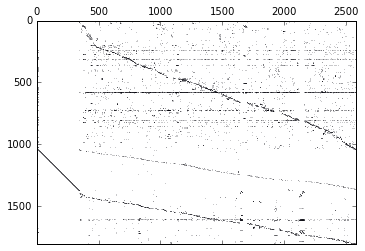

In [60]:
import matplotlib.pyplot as plt
plt.spy(S, precision=0.01, markersize=.1)

## Gene-Protein-Reaction Rules (GPRs)

In [49]:
import pandas

In [52]:
pandas.DataFrame([[reaction.id, reaction.gene_name_reaction_rule] for reaction in model.reactions], columns=['reaction', 'GPR'])

,reaction,GPR
0,ACALD,mhpF or adhE
1,ACALDt,None
2,ACKr,tdcD or ackA or purT
3,ACONTa,acnB or acnA
4,ACONTb,acnB or acnA
5,ACt2r,
6,ADK1,adk
7,AKGDH,lpd and sucA and sucB
8,AKGt2r,kgtP
9,ALCD2x,frmA or adhP or adhE


## Simulating models

In [5]:
model.solve()

,fluxes,reduced_costs
DM_4crsol_c,0.000219,-3.168299e-13
DM_5drib_c,0.000221,0.000000e+00
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000002,0.000000e+00
...,...,...
ZN2t3pp,0.000000,-2.073827e-03
ZN2tpp,0.000335,0.000000e+00
ZNabcpp,0.000000,-8.295308e-03
Zn2tex,0.000335,0.000000e+00


Somtimes a solution cannot be found. For example, setting the lower bound of the objective funtion to a very high value that the model cannot achieve will raise an exception when trying to solve the model.

In [12]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
infeasible_model.solve()

Infeasible: Solving model iJO1366 did not return an optimal solution. The returned solution status is "infeasible"

One can use `try` and `except` statements to handle those cases.

In [10]:
from cameo.exceptions import Infeasible

In [13]:
try:
    infeasible_model.solve()
except Infeasible:
    print('Oh no! The model is infeasible!')

Oh no! The model is infeasible!
